**primeramente importamos los paquetes con los que vamos a trabajar**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


**luego visualizamos el dataset para familiarizarnos con datos**

In [4]:
accidentes=pd.read_csv("accidentescerebrovasculares.csv")
accidentes


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


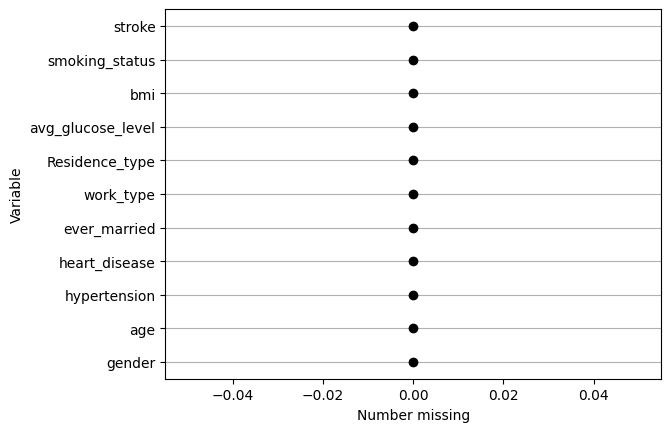

In [5]:
accidentes.missing.missing_variable_plot()

buscamos datos nulos inplicitos

In [6]:
accidentes.select_dtypes(object).apply(pd.unique)

gender                                              [Male, Female]
ever_married                                             [Yes, No]
work_type             [Private, Self-employed, Govt_job, children]
Residence_type                                      [Urban, Rural]
smoking_status    [formerly smoked, never smoked, smokes, Unknown]
dtype: object

In [7]:
accidentes.select_dtypes(float).apply(pd.unique)

age                  [67.0, 80.0, 49.0, 79.0, 81.0, 74.0, 69.0, 78....
avg_glucose_level    [228.69, 105.92, 171.23, 174.12, 186.21, 70.09...
bmi                  [36.6, 32.5, 34.4, 24.0, 29.0, 27.4, 22.8, 24....
dtype: object

In [8]:
accidentes.select_dtypes(int).apply(pd.unique)

,hypertension,heart_disease,stroke
0,0,1,1
1,1,0,0


podemos ver que hay un dato nulo escondido en la variable smoking_status

In [9]:
accidentes=accidentes.replace(
to_replace={"smoking_status": {'Unknown':np.nan}})

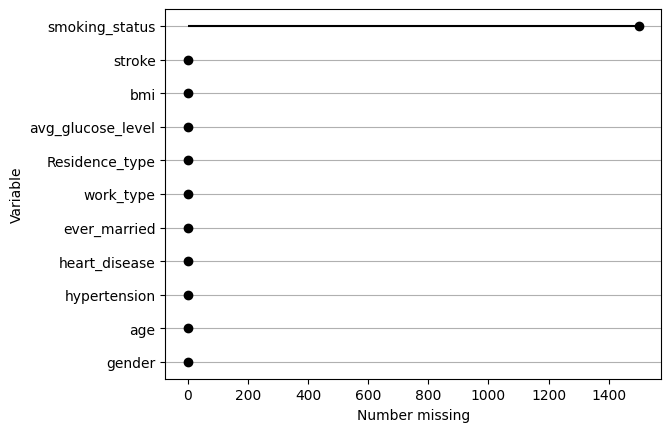

In [10]:
accidentes.missing.missing_variable_plot()

reemplazamos esos datos nulos con la moda pues son datos categoricos

In [11]:
from pandas.core.algorithms import mode
mode_value = accidentes['smoking_status'].mode()[0]
print("Valor de la moda:", mode_value)

Valor de la moda: never smoked


In [12]:
accidentes['smoking_status'].fillna(mode_value, inplace=True)

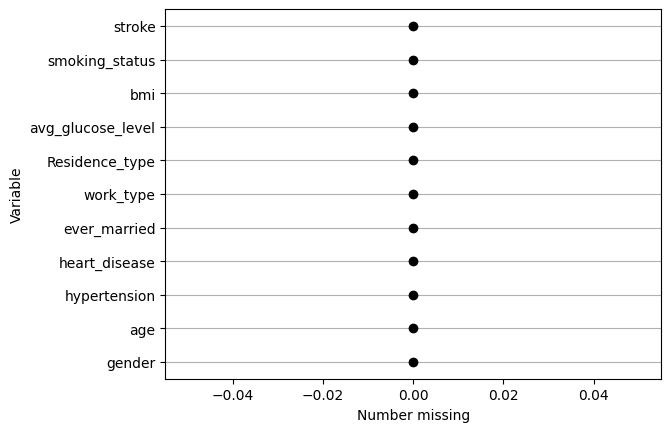

In [13]:
accidentes.missing.missing_variable_plot()

**con la funcion columns podemos ver cuales son las columnas del dataset**

In [14]:
accidentes.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

**tambien con tail y head visualizamos las primeras y las ultimas columnas**

In [15]:
accidentes.tail(10) #con el numero 10 le decimos a el programa qu queremos ver las 10 ultimas o las 10 primeras filas

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4971,Male,37.00,0,0,Yes,Private,Rural,107.06,29.7,smokes,0
4972,Male,72.00,0,1,Yes,Private,Rural,238.27,30.7,smokes,0
4973,Male,1.32,0,0,No,children,Rural,107.02,18.8,never smoked,0
4974,Male,58.00,0,0,Yes,Govt_job,Urban,84.94,30.2,never smoked,0
4975,Male,31.00,0,0,No,Private,Urban,215.07,32.7,smokes,0
4976,Male,41.00,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.00,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.00,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.00,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.00,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


**empezamos tratando de buscar patrones en los datos , en ocaciones hay patologias que pueden afectar mas a un sexo que al otro por ejemplo la osteoporosis usualmente afecta mas a la mujer que a los hombres, asi que agruparemos por sexo y por patologia como hypertesion**





In [16]:
accidentes.groupby(["hypertension", "gender"]).count()

age  heart_disease  ever_married  work_type  \
hypertension gender                                                 
0            Female  2643           2643          2643       2643   
             Male    1859           1859          1859       1859   
1            Female   264            264           264        264   
             Male     215            215           215        215   

                     Residence_type  avg_glucose_level   bmi  smoking_status  \
hypertension gender                                                            
0            Female            2643               2643  2643            2643   
             Male              1859               1859  1859            1859   
1            Female             264                264   264             264   
             Male               215                215   215             215   

                     stroke  
hypertension gender          
0            Female    2643  
             Male      1859  
1            Female     264  
             Male       215

**con esto podemos ver que una gran parte de la poblacion no sufre de hypertension que es un factor importante el los ACV, pero de la poblacion que si sufre podemos observar que hay una ligera inclinacion que esta patologia afecte mas a mujeres que a hombres, pero para determinar el por que se necesita la exploracion de muchos otros factores**

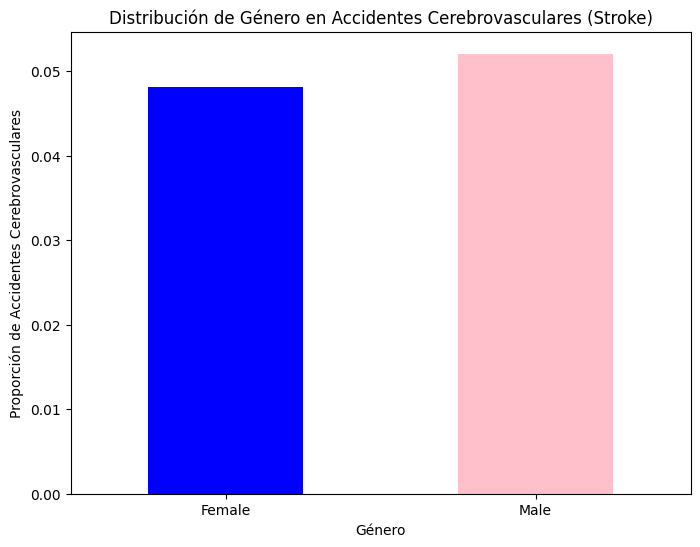

In [17]:
gender_stroke_counts = accidentes.groupby('gender')['stroke'].sum()

# Obtenemos la cantidad total de personas por género
gender_counts = accidentes['gender'].value_counts()

# Calculamos la proporción de accidentes cerebrovasculares por género
proporcion_stroke_por_genero = gender_stroke_counts / gender_counts

# Creamos el gráfico de barras
plt.figure(figsize=(8, 6))
proporcion_stroke_por_genero.plot(kind='bar', color=['blue', 'pink'])
plt.title("Distribución de Género en Accidentes Cerebrovasculares (Stroke)")
plt.xlabel("Género")
plt.ylabel("Proporción de Accidentes Cerebrovasculares")
plt.xticks(rotation=0)  # Rotamos etiquetas del eje x si es necesario

# Mostramos el gráfico
plt.show()

podemos ver que hay una ligera superioridad en los casos de accidentes en mujeres

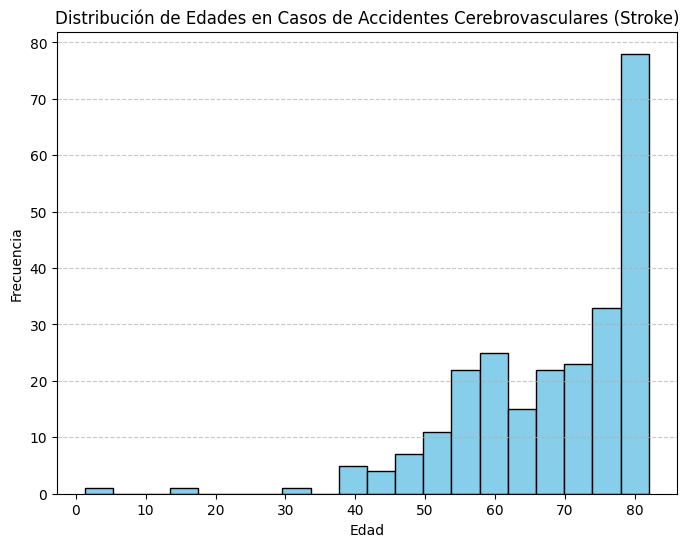

In [18]:
# Filtramos el DataFrame para obtener solo las filas con accidentes cerebrovasculares (stroke)
df_stroke = accidentes[accidentes['stroke'] == 1]

# Creamos el histograma de edades
plt.figure(figsize=(8, 6))
plt.hist(df_stroke['age'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribución de Edades en Casos de Accidentes Cerebrovasculares (Stroke)")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostramos el gráfico
plt.show()

### vemos que en promedio la edad mas frecuente de estos accidentes es entre 60 y 80 años aumentando las probabilidades a medida de que las personas pasan los 70 años

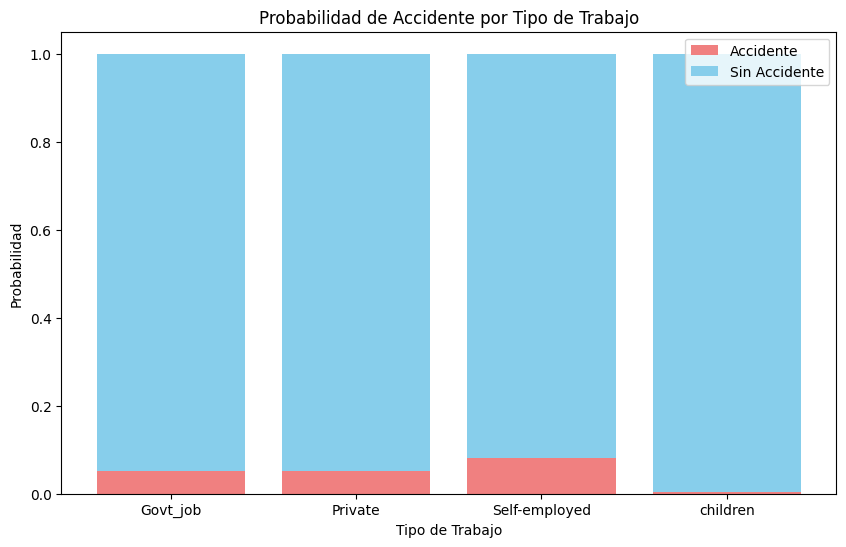

In [19]:
# Calculamos la probabilidad de accidente por tipo de trabajo
probabilidad_accidente_por_trabajo = accidentes.groupby('work_type')['stroke'].mean()

# Calculamos la probabilidad de no accidente (complemento)
probabilidad_no_accidente_por_trabajo = 1 - probabilidad_accidente_por_trabajo

# Creamos el gráfico de barras apiladas
plt.figure(figsize=(10, 6))
plt.bar(probabilidad_accidente_por_trabajo.index, probabilidad_accidente_por_trabajo, label='Accidente', color='lightcoral')
plt.bar(probabilidad_no_accidente_por_trabajo.index, probabilidad_no_accidente_por_trabajo, label='Sin Accidente', bottom=probabilidad_accidente_por_trabajo, color='skyblue')

plt.title("Probabilidad de Accidente por Tipo de Trabajo")
plt.xlabel("Tipo de Trabajo")
plt.ylabel("Probabilidad")
plt.legend()

# Mostramos el gráfico
plt.show()

podemos ver que la mayor parte de los accidentes les pasa a los que trabajan por cuenta propia , esto puede deberse a los niveles de estres

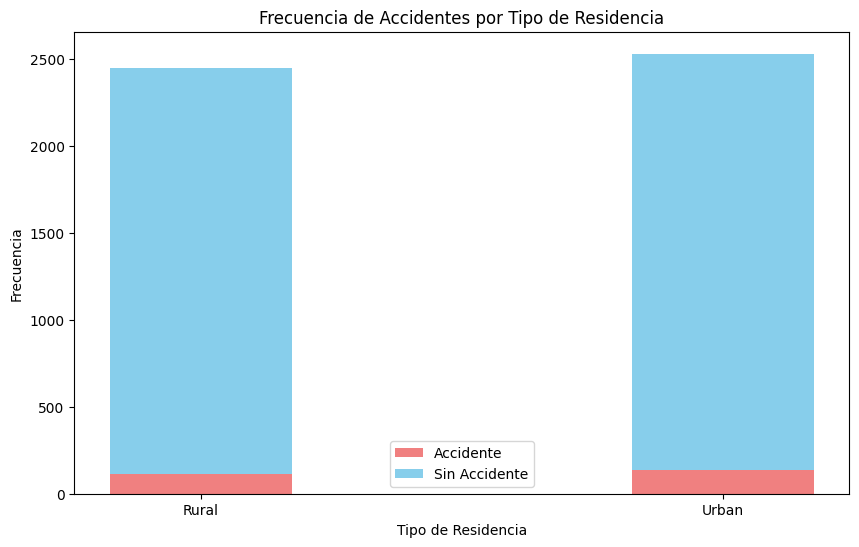

In [20]:
frecuencia_accidentes_por_residencia = accidentes.groupby('Residence_type')['stroke'].sum()

# Calculamos la frecuencia de no accidentes (complemento)
frecuencia_no_accidentes_por_residencia = accidentes.groupby('Residence_type')['stroke'].count() - frecuencia_accidentes_por_residencia

# Creamos el gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = frecuencia_accidentes_por_residencia.index
plt.bar(index, frecuencia_accidentes_por_residencia, bar_width, label='Accidente', color='lightcoral')
plt.bar(index, frecuencia_no_accidentes_por_residencia, bar_width, label='Sin Accidente', color='skyblue', bottom=frecuencia_accidentes_por_residencia)

plt.title("Frecuencia de Accidentes por Tipo de Residencia")
plt.xlabel("Tipo de Residencia")
plt.ylabel("Frecuencia")
plt.legend()

# Mostramos el gráfico
plt.show()

tambien podemos ver que en la zona urbana los accidentes son ligeramente un poco mas freceuntes , esto podria deberse al agitado ritmo de vida

**con el fin de ver ya la estructura de nuestros datos utilizamos la funcion info() para poder observar el tipo de datos que tenemos, la cantidad de valores nulos si es que los tenemos , y asi podemos ver si hay que transformar datos o tratar valores nulos**

In [21]:
accidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


**dentro de los datos que vamos a necesitar esta el genero , aqui surge un problema , es una variable categorica y los modelos de Machine Learning no aceptan variables categoricas para analizar, entonces tendrmos que tratar esta variable con el metodo get_dummies para transformarla en una variable numerica**

In [22]:
accidentes2=pd.get_dummies(data=accidentes['gender'], drop_first=True)
accidentes2

,Male
0,1
1,1
2,0
3,0
4,1
...,...
4976,1
4977,1
4978,0
4979,1


In [23]:
accidentes["generoMALE"]=accidentes2
accidentes.drop(columns=["gender"])

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,generoMALE
0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1
1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1
2,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0
3,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0
4,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0,1
4977,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0,1
4978,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0,0
4979,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0,1


**ahora comprobamos si la nueva columna de genero fue creada correctamente y vemos si ahora tiene un formato numerico**

In [24]:
accidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
 11  generoMALE         4981 non-null   uint8  
dtypes: float64(3), int64(3), object(5), uint8(1)
memory usage: 433.0+ KB


**ahora trataremos de busvar correlacion entre variables con una matriz de correlacion con el fin de ver si podemos asociar una variable con otra**

In [25]:
corr_matrix=accidentes.corr()
corr_matrix.style.background_gradient(cmap="coolwarm")

<ipython-input-25-10bbdf225a21>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=accidentes.corr()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,generoMALE
age,1.000000,0.278120,0.264852,0.236763,0.373703,0.246478,-0.026538
hypertension,0.278120,1.000000,0.111974,0.170028,0.158762,0.131965,0.021485
heart_disease,0.264852,0.111974,1.000000,0.166847,0.060926,0.134610,0.086476
avg_glucose_level,0.236763,0.170028,0.166847,1.000000,0.186348,0.133227,0.055796
bmi,0.373703,0.158762,0.060926,0.186348,1.000000,0.056926,-0.012093
stroke,0.246478,0.131965,0.134610,0.133227,0.056926,1.000000,0.008870
generoMALE,-0.026538,0.021485,0.086476,0.055796,-0.012093,0.008870,1.000000


**podemos ver que no existe gran correlacion entre variables, o por lo menos no existe una fuerte correlacion entre alguna de ellas**

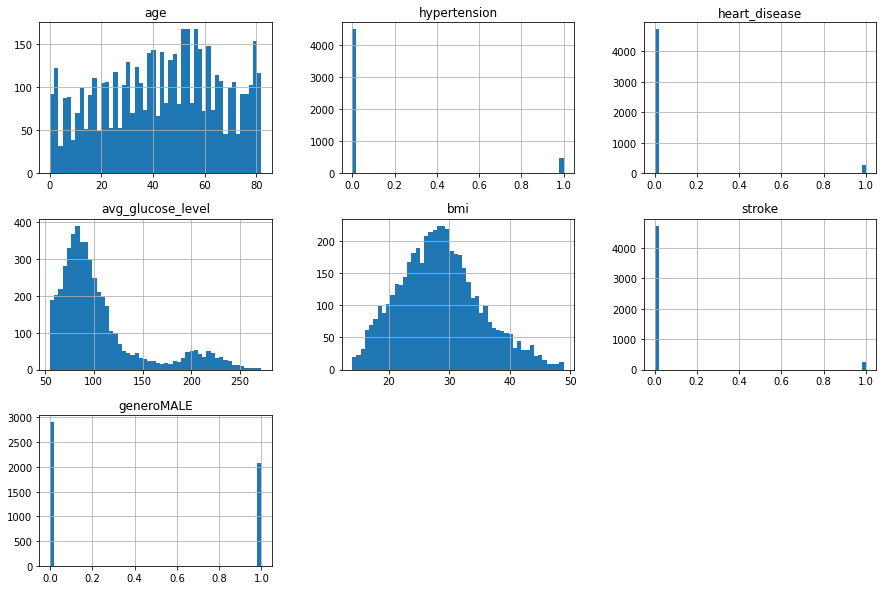

In [ ]:
accidentes.hist(bins=50, figsize=(15,10))
plt.show()

**ahora vamos a proceder a crear un nuevo arreglo solo con los datos que necesitamos para entrenar el algoritmo, en este caso , nos quedaremos con los factores que clinicamente son de mayor influencia en elos ACV  segun estudios medicos**

In [37]:
accidentes3= accidentes[["age","hypertension","bmi","heart_disease","avg_glucose_level","smoking_status","work_type","stroke"]]
accidentes3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4981 non-null   float64
 1   hypertension       4981 non-null   int64  
 2   bmi                4981 non-null   float64
 3   heart_disease      4981 non-null   int64  
 4   avg_glucose_level  4981 non-null   float64
 5   smoking_status     4981 non-null   object 
 6   work_type          4981 non-null   object 
 7   stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 311.4+ KB


procedemos a transformar nuestras columnas de tipo object a un formato legible por el algoritmo

In [38]:
accidentes_copia = accidentes3.copy(deep=True)

In [39]:
columnas_categoricas= accidentes_copia.select_dtypes(include=[object, "category"]).columns

In [40]:
import sklearn.compose
import sklearn.impute
import sklearn.preprocessing

categorical_transformer = sklearn.compose.make_column_transformer(
    (sklearn.preprocessing.OrdinalEncoder(), columnas_categoricas),
    remainder="passthrough")

In [41]:
datos_transformados = pd.DataFrame(
    categorical_transformer.fit_transform(accidentes_copia),
    columns=categorical_transformer.get_feature_names_out(),
    index=accidentes_copia.index
).rename(columns=lambda x: x.removeprefix("ordinalencoder__")
).rename(columns=lambda x: x.removeprefix("remainder__")
).rename(columns=lambda x: x.removeprefix("onehotencoder__"))


ahora tenemos nuestras etiquetas muy desbalanceadas , si entrenamos asi nuestro modelos no tendra la capacidad de predecir de buena manera ya que vera muchas etiquetas de un mismo grupo

In [67]:
%%capture
pip install -U imbalanced-learn

In [68]:
from imblearn.over_sampling import SMOTE



# Separamos las características (X) y la etiqueta (y)
X = datos_transformados.drop(columns=['stroke'])
y = datos_transformados['stroke']

# Aplicamos SMOTE para balancear las clases
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Creamos un nuevo DataFrame con las características y la etiqueta balanceada
datos_ok = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='stroke')], axis=1)

**empezamos cargando las librerias de machine learning y la primera se trata de la libreria que no vas a permitir dividir los datos en datos de entretamiento y datos de prueba para nuestro modelo de arbol de decision**

In [69]:
from sklearn.model_selection import train_test_split
datos_entrena, datos_prueba,clase_entrena,clase_prueba= train_test_split(
    datos_ok[["age","hypertension","bmi","heart_disease","avg_glucose_level","smoking_status","work_type"]],
    datos_ok["stroke"],
    test_size= 0.30) #con esto le decimos al programa que queremos que el 30% de nuestros datos sean de prueba

**ahora importamos nuestra libreria para empezar a fabricar nuestro arbol de decision, donde le decimos primeramente que el criterio que queremos que utilice para asignar los datos por el cual se va a hacer la division es Entropia, y luego le decimos que el numero maximo de pisos que queremos que tenga es 4**

In [70]:
from sklearn import tree

arbol_decision= tree.DecisionTreeClassifier(criterion="entropy",#fabricamos el arbol
                                            max_depth=3)
arbol=arbol_decision.fit(datos_entrena,clase_entrena) #entrenamos al arbol con nuestros datos de entrenamiento y nuestra  clase de entrenamiento

accuracy=arbol_decision.score(datos_prueba,clase_prueba) #vemos la precision de nuestro arbol

print(accuracy)

0.7950704225352113


**ahora graficamos nuestro arbol para ver la manera en que fue construido y como se particiono**

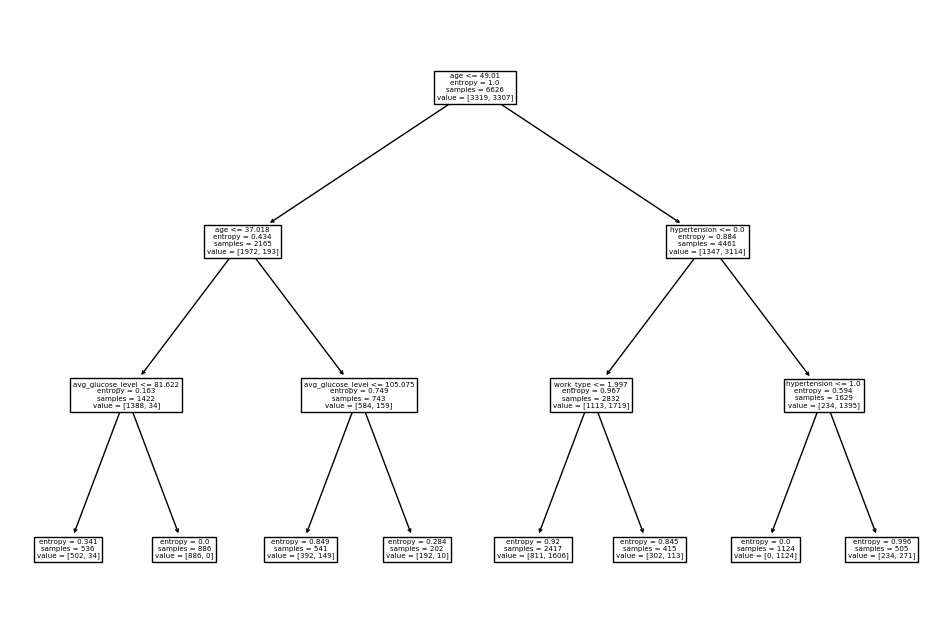

In [71]:
plt.figure(figsize=(12,8))
tree.plot_tree(arbol,
               feature_names=["age","hypertension","bmi","heart_disease","avg_glucose_level","smoking_status","work_type"])
plt.show()

**iniciamos prediciendo con nuestros datosde prueba**

In [72]:
prediccion=arbol_decision.predict(datos_prueba)#predecimos con nuestro datos de prueba
prediccion

array([1., 0., 1., ..., 1., 1., 1.])

**emepzamo a evaluar el arbol con el fin de ver que tan bueno es nuestro modelo, empezamos creando nuestra matriz de confusion para ver los aciertos**

In [73]:
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(clase_prueba,prediccion)
matriz

array([[ 953,  461],
       [ 121, 1305]])

**mediantes metricas para medir lo bueno que fue nuestro arbol ,medimos el accuracy, la precision, el f1_acore y el recall_score**

In [74]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(clase_prueba,prediccion)
accuracy

0.7950704225352113

In [75]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Suponiendo que 'predicciones' es tu array de predicciones y 'clase_prueba' son las etiquetas de prueba
# Calcula la precisión (precision)
precision = precision_score(clase_prueba, prediccion)

# Calcula el recall
recall = recall_score(clase_prueba, prediccion)

# Calcula el F1-score
f1 = f1_score(clase_prueba, prediccion)

# Imprime los resultados
print(f'Precisión (Precision): {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')







Precisión (Precision): 0.7389580973952435
Recall: 0.9151472650771388
F1-score: 0.8176691729323309


In [76]:
probabilidades= arbol_decision.predict_proba(datos_prueba)
probabilidades=probabilidades[:,1]
probabilidades

array([1.        , 0.27228916, 0.66446007, ..., 0.53663366, 0.66446007,
       1.        ])

**calculamos nuestra area bajo la curva**

In [77]:
from sklearn.metrics import roc_auc_score, roc_curve

auc=roc_auc_score(clase_prueba,probabilidades)
auc

0.874593327395252

In [88]:
'''guardamos nuestro modelo '''

import joblib

ruta_carpeta =r'/content/sample_data'
nombre_archivo = 'modelo1.pkl'

ruta_completa = ruta_carpeta + '/' + nombre_archivo
joblib.dump(arbol, ruta_completa)

['/content/sample_data/modelo1.pkl']

**el modelo es un modelo muy bueno , pero en ocaciones los arboles de decision tienen un inconveniente y es que se sobreajustan a los datos con facilidad, por lo mismo vamos a crear otro modelo pero ahora uno denominado random forest que es la combinacion de muchos arboles de decision**

# **random** **forest**

In [78]:
from sklearn.ensemble import RandomForestClassifier #cargamos nuestra libreria

**diseñamos ahora nuestro bosque aleatorio , indicandoles que queremos un total de 90 arboles de decision, tambien que queremos usar el indice gini para decidir los criterio de division, tambien le decimos que como muestra queremos que tome un tercio de los datos, tambien le decimos que de esos datos haga un muestreo aleatorio y con ol oob_score le decimos que los datos que no use despues del muestro los utilice para validacion**

In [79]:
bosque = RandomForestClassifier(n_estimators=90,
                                criterion="gini",
                                max_features="sqrt",
                                bootstrap=True,
                                max_samples=2/3,
                                oob_score=True)



**entrenamos nuestro bosque con nuestros datos de entrenamiento y nuestra clase de entrenamiento**

In [80]:
bosque.fit(datos_entrena,clase_entrena)

RandomForestClassifier(max_samples=0.6666666666666666, n_estimators=90,
                       oob_score=True)

**ahora predecimos con nuestros datos de prueba y vemos que tan robusto es el modelo**

In [81]:
print(bosque.predict(datos_prueba))
print(bosque.oob_score_)

[1. 0. 0. ... 1. 1. 1.]
0.9654391789918503


In [87]:
'''guardamos nuestro modelo '''

import joblib

ruta_carpeta =r'/content/sample_data'
nombre_archivo = 'modelo2.pkl'

ruta_completa = ruta_carpeta + '/' + nombre_archivo
joblib.dump(bosque, ruta_completa)

['/content/sample_data/modelo2.pkl']